# DeLong and Olney Macroeconomics 3rd Edition ch 1 sn 1.2

## Setting up the environment

In [1]:
%%javascript

IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;}

<IPython.core.display.Javascript object>

In [2]:
# the above "magic" (%%) command is there to keep output cells 
# from shifting to autoscroll, which leaves you peering at a 
# small portion of a window looking for whatever the computer
# just did in the output cell...

In [3]:
# set up the environment by reading in libraries: 
# os... graphics... data manipulation... time... math... statistics...
# and reporting version numbers to help at debugging
#
# needs to be cleaned, as contains excess and unneeded libraries...

import sys
import os
from urllib.request import urlretrieve

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import PIL as pil

import plotly
plotly.tools.set_credentials_file(
    username='delong', 
    api_key='d6vMMwVn4sEBmR2MLN9H')

import plotly.plotly as py
import plotly.graph_objs as go
from plotly.graph_objs import Scatter
from IPython.display import Image

import pandas as pd
from pandas import DataFrame, Series
import pandas_datareader
from datetime import datetime

import scipy as sp
import numpy as np
import math
import random

import seaborn as sns
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

# report library versions...

print("LIBRARY VERSIONS")
print(" ")
print("Python version:\n{}\n".format(sys.version))
print("matplotlib version: {}".format(mpl.__version__))
print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("statsmodels version: {}".format(statsmodels.__version__))
print("PIL version: {}".format(pil.__version__))
print("scipy version: {}".format(sp.__version__))

/Users/delong/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



LIBRARY VERSIONS
 
Python version:
3.6.1 |Anaconda custom (x86_64)| (default, May 11 2017, 13:04:09) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]

matplotlib version: 2.0.2
pandas version: 0.20.1
numpy version: 1.12.1
statsmodels version: 0.8.0
PIL version: 4.1.1
scipy version: 0.19.0


In [4]:
%matplotlib inline 

In [5]:
# the above cell "magic" (%) tells the matplot lib graphics library
# to plot graphs as static figures output cells, rather than in new
# windows (or in the alternative "%matplotlib notebook" view, as a
# dynamic interactive figure)

In [6]:
# graphics setup: seaborn-whitegrid to make the output from matplotlib
# prettier and figure_size to make the output from matplotlib
# somewhat larger...

plt.style.use('seaborn-whitegrid')

figure_size = plt.rcParams["figure.figsize"]
figure_size[0] = 10
figure_size[1] = 8
plt.rcParams["figure.figsize"] = figure_size

In [7]:
# import delong functions
# get or download data file:
from delong_functions.data_functions import getdata_read_or_download 

# initialize basic figure:
from delong_functions.stat_functions import initialize_basic_figure

# from delong_functions.calc_and_graph_functions also exists...

# NOW COMMENTED OUT: check to see if functions successfully created... 
# NOW COMMENTED OUT: getdata_read_or_download? initialize_basic_figure?

## 1.2 Tracking the Macroeconomy

#### 1.2.1 Economic Statistics and Economic Activity

Macroeconomics could not exist without the economic statistics that are system  atically collected and disseminated by governments. Estimates of the value and composition of economic activity, principally those contained in the national income and product accounts (NIPA) reported by the U.S. Commerce Department’s Bureau of Economic Analysis, are the fundamental data of macroeconomics. We cannot try to explain fluctuations in economic activity unless we know what those fluctuations are.

But what is economic activity?

Whenever you work for someone and get paid, that is economic activity. When  ever you buy something at a store, that is economic activity. Whenever the govern  ment taxes you and spends its money to build a bridge, that is economic activity. In general, if a flow of money is involved in a transaction, economists will count that transaction as economic activity. Overall, economic activity is the pattern of transactions in which things of real, useful value—resources, labor, goods, and services—are created, transformed, and exchanged. If a transaction does not involve something of useful value being exchanged for money, odds are that NIPA will not count it as part of economic activity.

In the United States, individual economic statistics are released month by month and quarter by quarter, a quarter being a three-month period: a quarter of a year. Thus you will often hear economists and other analysts talk about the “change in inventories in the second quarter.” Table 1.2 shows a sample of the kinds of economic data that economists, politicians, and others, including investors in the stock and bond markets, use to assess the course of the economy. The sheer num  ber of statistics is confusing at first glance, but all the statistics either (1) are direct measures of six key economic indicators that together tell most of the story or (2) are primarily useful as partial forecasts of or as factors that help determine the six key indicators of economic activity.

----

### Box 1.2.1 (a): The Flow of Economic Data (REV)

Here are twenty-one economic variables that one of us—Brad DeLong—currently tracks on his "Brad DeLong's FRED Economic Statistics Dashboard" <https://research.stlouisfed.org/dashboard/215>:

<img style="display:block; margin-left:auto; margin-right:auto;" src="http://delong.typepad.com/.a/6a00e551f08003883401b8d2a7a65e970c-pi" alt="Brad DeLong s FRED Dashboard St Louis Fed" title="Brad_DeLong_s_FRED_Dashboard_-_St__Louis_Fed.png" border="0" width="800" />
<img style="display:block; margin-left:auto; margin-right:auto;" src="http://delong.typepad.com/.a/6a00e551f08003883401b7c91d3b54970b-pi" alt="Brad DeLong s FRED Dashboard St Louis Fed" title="Brad_DeLong_s_FRED_Dashboard_-_St__Louis_Fed.png" border="0" width="800" />
<img style="display:block; margin-left:auto; margin-right:auto;" src="http://delong.typepad.com/.a/6a00e551f08003883401bb09c07240970d-pi" alt="Brad DeLong s FRED Dashboard St Louis Fed" title="Brad_DeLong_s_FRED_Dashboard_-_St__Louis_Fed.png" border="0" width="800" />
<img style="display:block; margin-left:auto; margin-right:auto;" src="http://delong.typepad.com/.a/6a00e551f08003883401bb09c07231970d-pi" alt="Brad DeLong s FRED Dashboard St Louis Fed" title="Brad_DeLong_s_FRED_Dashboard_-_St__Louis_Fed.png" border="0" width="800" />

The opportunity to construct such an automatically-updated dashboard of economic variables and quantities — both their most current values and some of the history — is a service programmed, hosted, and maintained by the U.S. Federal Reserve System's Regional Bank of St. Louis: <http://stlouisfed.org> in its Federal Reserve Economic Database (FRED) system: <http://fred.stlouisfed.org>. Register for a free account at <https://www.stlouisfed.org> and construct your own.

We are not going to go through all of these — and, indeed, there are some not included here that we will go through — because we are going to concentrate on those that are most salient for the purposes of this particular course.

----

**NOTE TO SELF: IS THERE A QUICK WAY TO REPRODUCE THIS TODAY?**: A table of statistics from late 2004:

<img style="display:block; margin-left:auto; margin-right:auto;" src="https://www.evernote.com/l/AAHKq0gxb-RAt6GI58NKlYNnzzJG1VNc2jIB/image.png" width="800" />

----

### 1.2.2 Five Key Sets of Measures

You can get a good idea of the pulse of recent economic activity by simply looking at a few—five—key sets of measures of various aspects of the economy. If you want to be able to say more than “the economy is good” or “the economy is not so good,” you need to understand and be able to analyze these five key sets of measures. Together they do not tell us everything. But taken together they do tell us a lot They are:

1. Real output: national income and product.
2. The employment and unemployment ratez.
3. The inflation rate and the price level.
4. Interest rates and the stock market.
5. The exchange rate.

The first two are the most important: They are directly and substantially connected to people’s material well-being. 

The other three are indicators and controls that are not directly and immediately connected to people’s current material well-being, but they profoundly influence the economy’s direction. 

Let’s look at each of these sets of measures more closely:

#### 1.2.2.1 Real output: national income and product

The first key set of measures consists of measures of the overall level of economic activity: How much is being produced? How valuable is what is being produced? What are people's incomes.

Economic statisticians' best attempts to estimate such quantities are contained in the framework of the _National Income and Product Accounts_. In this framework, the most often cited concept is the framework's attempt to estimate the value of the useful goods and services produced in the economy: the _national product_ or the _domestic product_, which is very closely related to the almost equivalent _national income_ (for how could something be produced and sold without the money paid for it becomeing somebody's income? It coudl not). And the single statisic most cited is the level of real gross domestic product, called _real GDP_, or often just _GDP_ for short.

**Definition: Real GDP: Inflation-adjusted gross domestic product; the most commonly used measure of national product, output, and income earned through domestically produced goods and services.**

But be careful, because "GDP" can also mean not how much is produced, but how much is produced times the number of dollars it sells for. Real GDP is almost always expressed in per-year terms, for it is a flow: it is not a previously-produced heaped-up pile of stuff. It is, rather, how valuable are the useful goods and services produced over the course of a year.

It is worth unpacking the name: _real GDP_:

* “Real” means that this measure corrects for changes in the overall level of prices. If total spending doubles because the average level of prices doubles but the total flow of commodities does not change, then real GDP does not change. Economic variables are either real — that is, they have been adjusted for changes in the price level and inflation — or nominal — that is, they have not been adjusted for changes in the price level and inflation. 
* “Gross” means that this measure includes the replacement of worn-out and obsolete equipment and structures as well as completely new investment. (Gross measures contrast with net measures, which include only investment that adds to the capital stock — not investment that merely replaces worn-out and obsolete capital stock. Net mea  sures are better than gross measures, but the information needed to construct them is not as reliable.)
* “Domestic” means that this measure counts economic activity that happens in the United States, whether or not the workers are legal residents and whether or not the factories are owned by American companies. (Domestic measures contrast with national measures, which count all the economic activity conducted by U.S. citizens and other permanent residents and by the companies they own.) 
* Finally, “product” means that real GDP represents the production of final goods and services. It includes both consumption goods (things that consumers buy, take home or take out, and consume) and investment goods (things like machine tools, office equipment, and newly constructed houses and office buildings, which boost the country's capital stock and productive capacity). It also includes government pur  chases, things that the government (acting as our collective agent) buys and uses. 

Real GDP divided by the number of people or of workers in the economy are the most frequently used summary indexes of the economy. It is a measure of how well the economy is doing at its task of producing goods and services that people find useful — the necessities, conveniences, and luxuries of life. 

It is, however, a flawed and imperfect index. It says nothing, for instance, about the relative distribution of the nation’s economic product. And because it measures market prices, not user satisfaction, it is an imperfect measure of material well-being.

**Definition: Real GDP per worker: One of the best available measures of the overall pace of long-term economic growth: real GDP divided by the number of workers. (Alternatively, average production per hour times the total number of hours worked.**



----            

##### Box 1.2.2.1 (a): U.S. Real National Product: Data

<img style="float:right;" src="http://delong.typepad.com/.a/6a00e551f08003883401b7c9222b2c970b-pi" alt="Real Output per Capita in the United States" title="Real_Output_per_Capita_in_the_United_States.png" border="0" width="400" height="400" />

In the year 2016, calculated using 2009 prices, officially measured U.S. real GDP per capita — the total value of all final goods and services produced in the United States divided by the number of people in the country — reached 51,000 dollars a year. The _measured_ productivity of the average American worker had grown seven and a half-fold over the previous century, when the standard estimate of 2000-price real GDP per worker was less than 7000 per year in 2000-value dollars a year. Amazingly, this upward leap in economic well-being was accomplished in a little less than four generations.

U.S. national product per capita had grown four-fold over the previous century, from 1816 to 1926 — less rapidly than over the bulk of the twentieth century, but still transformative. And real national product per capita in 1816 stood 50 percent higher than it had back at the start of the 1790s in the earliest days of the federal government. All in all, the _measured_ level of production _per capita_ in the United States today stands at 46 times what it was in 1790 — and the U.S. in 1790 was then, in the context of the world as it was then, a resource-rich technology and organizationally-blessed economy.

The adjacent figure shows this upward trend in real national product per capita. Despite temporary setbacks in recessions and depressions — of which the Great Depression of the 1930s was by far the largest — the principal event of the twentieth century was this sextupling of measured real GDP per worker. Other macroeconomic events visible in the figure include the World War II boom, the 1974-1975 and the 1980-1983 major recessions, the 1990-1991 minor recession, the two-decade-long period of stagna  tion from the early 1970s to the early 1990s — a period that saw the 1973 and 1979 sharp oil price increases by OPEC and the large investment-reducing government budget deficits of the 1980s — and the pre-1973 and post-1995 decade-long booms.

Note that this figure says nothing at all about how economic growth was distributed. In fact, the years between 1930 and 1975 saw the middle and working classes diminish the relative income gap between themselves and the rich. The years between 1975 and the present have seen this gap open much wider once again.

In [8]:
# reading in the previously-downloaded long-run real GDP and 
# GDP per capita file from Johnston and Williamson's "Measuring 
# Worth" website
#
# constructing a dataframe to hold the data, and then wrapping
# that dataframe inside a dict object to append source notes and
# links

Source_URL = 'http://delong.typepad.com/2017-09-12_us_real_gdp_and_per_capita.csv' 

uslrnp_df = pd.read_csv(
    Source_URL, 
    converters = {'Source': str, 'Source_URL': str}, 
    parse_dates = True,
    index_col = 0)

uslrnp_dict = {}
uslrnp_dict["Source"] = uslrnp_df.Source.values[0]
uslrnp_dict["SourceURL"] = Source_URL

sourceD1 = "See Johnston and Williamson: "
sourceD2 = "'Sources and Techniques Used in the Construction of Annual GDP, 1790 - Present' "
sourceD3 = "https://www.measuringworth.com/usgdp/#"
uslrnp_dict["SourceNotes"] = sourceD1 + sourceD2 + sourceD3

sourceD4 = "See https://www.measuringworth.com/aboutus.php; "
sourceD5 = "https://www.measuringworth.com/datasets/usgdp/export.php?"
sourceD6 = "year_source=1790&year_result=2016&use%5B%5D=REALGDP&use%5B%5D=GDPCP"
uslrnp_dict["SourceDescription"] = sourceD4 + sourceD5 + sourceD6

del uslrnp_df["Source"]
del uslrnp_df["Source_URL"]

uslrnp_dict["df"] = uslrnp_df

# commented out 
# uslrnp_dict

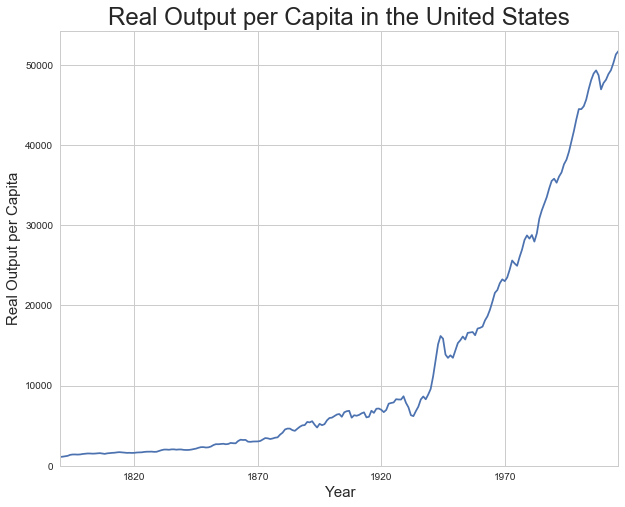

In [9]:
# generating four simple graphs of Real GDP — total and per capita,
# linear and log scale
# 
# this first graph is the version that belongs in the textook, IMHO...

uslrnp_df.Real_GDP_per_Capita.plot()

plt.xlabel("Year", size = 15)
plt.ylabel("Real Output per Capita", size = 15)
plt.ylim(0, )
plt.title("Real Output per Capita in the United States", size = 24)



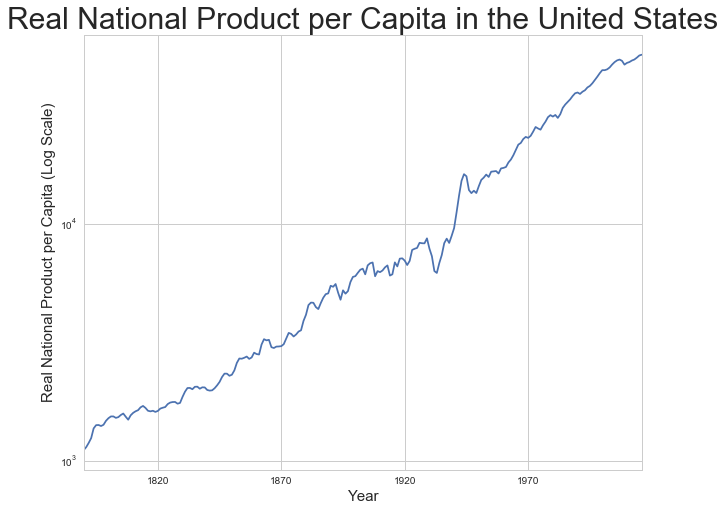

In [10]:
uslrnp_df.Real_GDP_per_Capita.plot(logy = True)


plt.xlabel("Year", size = 15)
plt.ylabel("Real National Product per Capita (Log Scale)", size = 15)
plt.title("Real National Product per Capita in the United States", 
    size = 30)

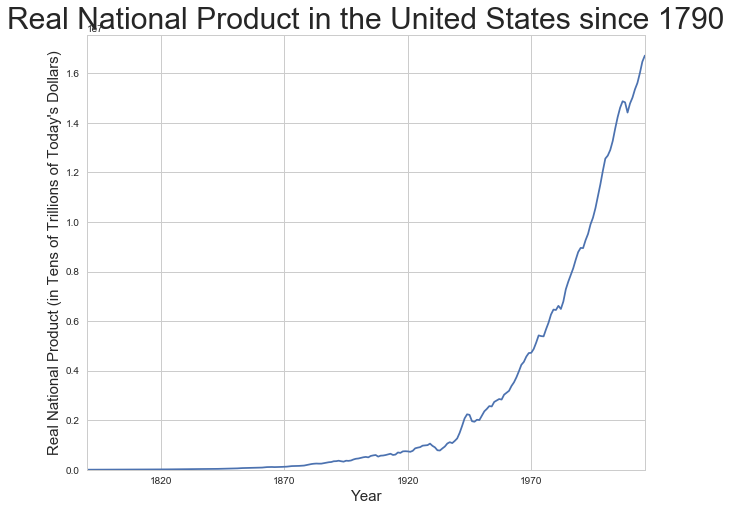

In [11]:
uslrnp_df.Real_GDP.plot()

plt.xlabel("Year", size = 15)
plt.ylim(0, )
plt.ylabel("Real National Product (in Tens of Trillions of Today's Dollars)", size = 15)
plt.title("Real National Product in the United States since 1790", size = 30)

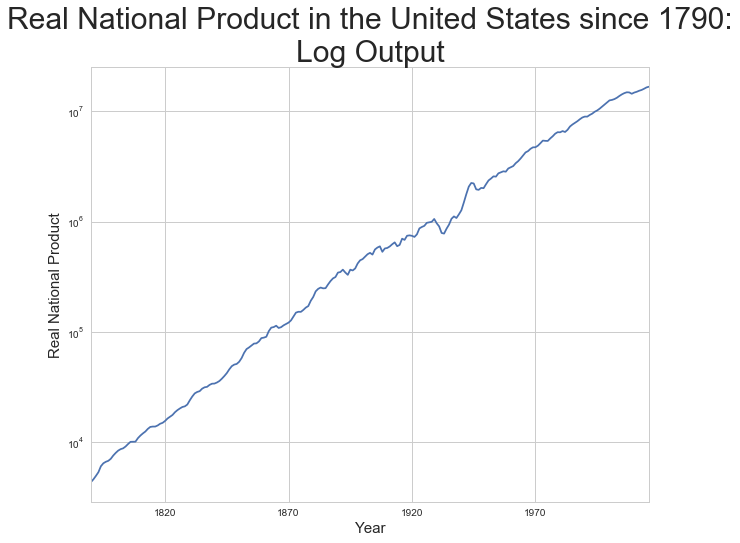

In [12]:
uslrnp_df.Real_GDP.plot(logy = True)

plt.xlabel("Year", size = 15)
plt.ylabel("Real National Product", size = 15)
plt.title("Real National Product in the United States since 1790:\nLog Output", size = 30)

In [13]:
uslrnp_df.Real_GDP_per_Capita[226]/uslrnp_df.Real_GDP_per_Capita[126]

7.5310003598678836

In [14]:
uslrnp_df.Real_GDP_per_Capita[226]

51690.0

In [15]:
uslrnp_df.Real_GDP_per_Capita[126]

6863.6300000000001

In [16]:
uslrnp_df.Real_GDP_per_Capita[26]

1622.25

In [17]:
uslrnp_df.Real_GDP_per_Capita[0]

23024.0

In [18]:
uslrnp_df.Real_GDP_per_Capita[226]/uslrnp_df.Real_GDP_per_Capita[0]

2.2450486448922864

----

#### 1.2.2.2 The employment and unemployment rates

<img src="http://delong.typepad.com/.a/6a00e551f08003883401b7c922f604970b-pi" alt="2017 08 11 DeLong and Olney Macroeconomics 3rd Edition ch 1 sn 1 2" title="25-54 Employment to Population Literature (Not Seasonally Adjusted)" border="0" width="400" height="400" style="float:right;" />

The second key sets of measures concern the state of the labor market: how many people hae jobs, and how many people who want to have jos do not have them.

The _employment rate_ is the share of people who have jobs. The _unemployment rate_ is the fraction of people who want jobs and are either in or actively searching for jobs who do not have them. The unemployment rate is equal to the number of unemployed people divided by the total _labor force_, which is in turn the sum of the number of unemployed people and the number of people who have jobs. 

**Definitions: The unemployment rate: the share of the labor force who are looking for but have not found an acceptable job. The labor force: those adults who either have jobs or are actively looking for work. The employment rate: the share of adults who have jobs.**

The employment and unemployment rates are estimated by the U.S. Labor Department’s Bureau of Labor Statistics. It conducts, over a week in the middle of every month, the Current Population Survey: a random survey of 60,000 of America’s households. The survey results are released to the public on the first Friday of the next month.

The figure plots the U.S. employment rate for 25 to 54 year olds in the United States since 1960. This series is not "seasonally adjusted". By and large 25-54 year olds are too old to be in school, and too young to be retired, so demographic shifts in the age distribution of the population should not cause large movements in _this_ employment rate. Four features jump out from this graph:

1. Feminism: the jump from 65% to 81% from 1960 to 2000 in the percentage of Americans 25-54 who were at work reflects reduced discrimination against women in the work place and increased desire by women (and by male members of their families) for paying jobs. This is a huge sociological and economic shift that has taken place not long ago, in terms of human lifespan.

2. The business cycle collapses in employment during downturns: depressions and recessions, of which 2007-2010 is by far the largest in the period since 1960. These declines are accompanied by large rises in the unemployment rate: it is not that people suddenly decide that working is a bad bargain, or suddenly acquire a taste to take a Great Vacation. It is that all of a sudden a large number of people who want jobs like those others in society have on similar terms cannot find them. Why not? Because the spending isn't there to make establishments and their managers confident that they could sell what the additional workers they might hire would produce.

3. The short-term year-by-year seasonal variations in employment. Employment is extra high in November as businesses are hiring bigtime for the Christmas rush, and then drops with the new year. As the weather improves in the northern states, employment picks up both as construction expands and then expands more as Christmas again approaches. These fluctuations used to be much larger: employment was two percentage points higher in November than in January back in the early 1960s; these days the seasonal fluctuations are only half as large. (Most data and indicators you will see in macroeconomics are _seasonally adjusted_ — the belief is that the seasonal variations are predictable and understandable and straightforward, and that it is more interesting to look at the time series with the "seasonal" pattern taken out.)

4. Since 2000, a decline in the 25-54 employment rate in better and in worse years alike. Is this because the economy has become constantly semi-depressed — that even the relatively good years do not see the market economy functioning terribly well in terms of generating jobs for those who want them, and matching workers to jobs in which they would be productive? Is it because the benefits of having a paid job were oversold in the 1990s? Over and above this decline in the employment-to-population ratio for 25-54 year olds there has been a large increase in the share of Americans old enough to be retired. But a larger proportion of retired persons does not account for the decline in _this_ prime-age employment measure.

<img src="http://delong.typepad.com/.a/6a00e551f08003883401b8d2ade89d970c-pi" alt="Unemployment Rate, 1929-42 and 1948-Present" title="Unemployment Rate, 1929-42 and 1948-Present" border="0" width="400" height="400" style="float:right;" />

Most people consider unemployment to be a bad thing. It usually is — especially in 1982 or 2010, let alone 1933. When the unemployment rate is high, the market economy is not functioning well.

Traditionally, the unemployment rate has been the best indicator of how well the economy is doing relative to its productive potential. In recent years, however, some economists have worried that the unemployment rate is becoming less useful as an indi  cator of the amount of “slack” in the economy — the gap between production and the economy’s potential. Employment fell sharply in the early 2000s, but the unem  ployment rate did not rise by much. This raised the possibility that many adults who were calling themselves “out of the labor force” were in fact discouraged workers — people who would be looking for (and finding) jobs if the macroeconomic news were better — and thus should be taken into account in calculating the economy’s productive potential.

Yet it is important to notice that an economy with no unemployment at all would probably be a badly working economy. Just as an economy needs inventories of goods — goods in transit, goods in process, goods in warehouses and sitting on store shelves — in order to function smoothly, it needs “inventories” of jobs looking for workers (i.e., vacancies) and workers looking for jobs (i.e., the unemployed). An economy in which each business grabbed the first person who walked through the door to fill a newly open job and in which each worker took the first job offered would be a less productive economy. Workers should be somewhat choosy about what jobs they take. They should decline jobs when they think that “this job pays too little” or “this job would be too unpleasant.” Likewise, employers should be choosy about which workers they hire. Such _frictional unemployment_ is an inevitable part of the process that makes good matches between workers and firms — matches that pair qualified workers with jobs that use their qualifications.

During recessions and depressions, however, unemployment is definitely not frictional. In deep downturns in the business cycle, especially, the unemployment rate can rise far above the level resulting from a normal and healthy process of job search. The mar  ket economy breaks down, failing to match workers willing and able to work with businesses that could put their skills and labor power to making useful goods and services. Economists call this type of unemployment cyclical unemployment. In the United States during the Great Depression the unemployment rate rose to 25 per  cent. In Germany during the same period, the rate rose to 33 percent.

The historical track of the U.S. unemployment rate since 1929 shows a number of times when the unemployment rate tells us that the economy is functioning relatively badly: not generating jobs for those who want to work on the terms and conditions that the employed are working on — consider 1975, 1982, and 2010. But these episodes of high unemployment are dwarfed by the Great Depression, which saw the economy's business-cycle nadir in 1933 and then a renewed sharp downturn in 1937-1938.

In [19]:
# reading in the previously-downloaded long-run real employment rate series 
# from FRED: Federal Reserve Economic Data at the St. Louis Fed
# http://fred.stlouisfed.org
#
# constructing a dataframe to hold the data, and then wrapping
# that dataframe inside a dict object to append source notes and
# links

SourceURL = "http://delong.typepad.com/lrem25ttusm156n-1.csv"

emplpop2554_df = pd.read_csv(
    SourceURL, 
    parse_dates = True,
    index_col = 0)

emplpop2554_dict = {}
emplpop2554_dict["df"] = emplpop2554_df
emplpop2554_dict["Source"] = "Federal Reserve Economic Data: Series LREM25TTUSM156N"
emplpop2554_dict["SourceURL"] = SourceURL
emplpop2554_dict["SourceNotes"] = "See https://fred.stlouisfed.org/graph/?id=LREM25TTUSM156N,"

Source_Description_1 = "25 to 54 year old employment-to-population ratio from FRED, "
Source_Description_2 = "not seasonally adjusted"
emplpop2554_dict["SourceDescription"] = Source_Description_1 + Source_Description_2

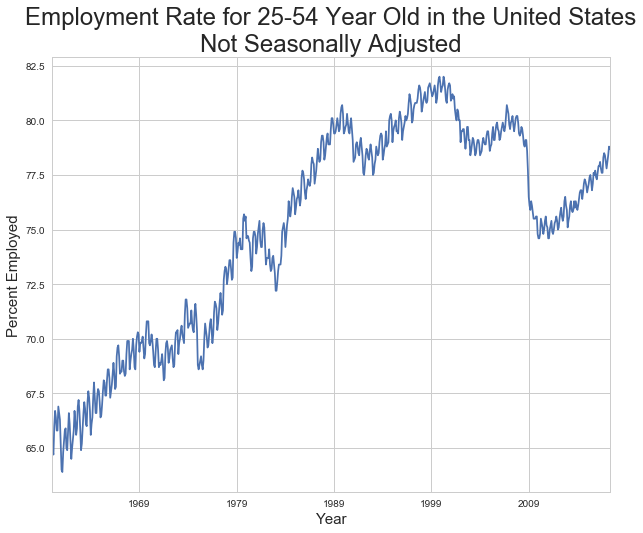

In [20]:
emplpop2554_df.plot(legend = False)

plt.xlabel("Year", size = 15)
plt.ylabel("Percent Employed", size = 15)
plt.title("Employment Rate for 25-54 Year Old in the United States\nNot Seasonally Adjusted", size = 24)

In [21]:
# reading in the previously-downloaded long-run unemployment rate  
# series from FRED: Federal Reserve Economic Data at the St. Louis 
# Fed http://fred.stlouisfed.org series M0892AUSM156SNBR
#
# constructing a dataframe to hold the data, and then wrapping
# that dataframe inside a dict object to append source notes and
# links

SourceURL = "http://delong.typepad.com/m0892ausm156snbr.csv"

unemp2942_df = pd.read_csv(
    SourceURL, 
    parse_dates = True,
    index_col = 0)

unemp2942_dict = {}
unemp2942_dict["df"] = unemp2942_df
unemp2942_dict["SourceURL"] = SourceURL
unemp2942_dict["Source"] = "Federal Reserve Economic Data: Series M0892AUSM156SNBR"

SourceNotes_1 = "Seasonally-adjusted unemployment rate 1929-42"
SourceNotes_2 = "see https://fred.stlouisfed.org/graph/?id=M0892AUSM156SNBR,"
unemp2942_dict["SourceNotes"] = SourceNotes_1 + SourceNotes_2

SourceDescription_1 = "Unemployment rate 1929-42; "
SourceDescription_2 = "http://www.nber.org/databases/macrohistory/contents/"
unemp2942_dict["SourceDescription"] = SourceDescription_1 + SourceDescription_2

SourceURL = "http://delong.typepad.com/unrate.csv"

unemp48_df = pd.read_csv(
    SourceURL, 
    parse_dates = True,
    index_col = 0)

unemp48_dict = {}
unemp48_dict["df"] = unemp48_df
unemp48_dict["SourceURL"] = SourceURL
unemp48_dict["Source"] = "Federal Reserve Economic Data: Series UNRATE"

SourceNotes_1 = "Seasonally-adjusted unemployment rate since 1948; "
SourceNotes_2 = "see https://fred.stlouisfed.org/graph/?id=UNRATE,"
unemp48_dict["SourceNotes"] = SourceNotes_1 + SourceNotes_2 
unemp48_dict["SourceDescription"] = "Unemployment rate since 1948"

unemp_df = pd.concat([unemp2942_df, unemp48_df])

# NOW COMMENTED OUT
# unemp48_dict
# unemp2942_dict
# unemp_df

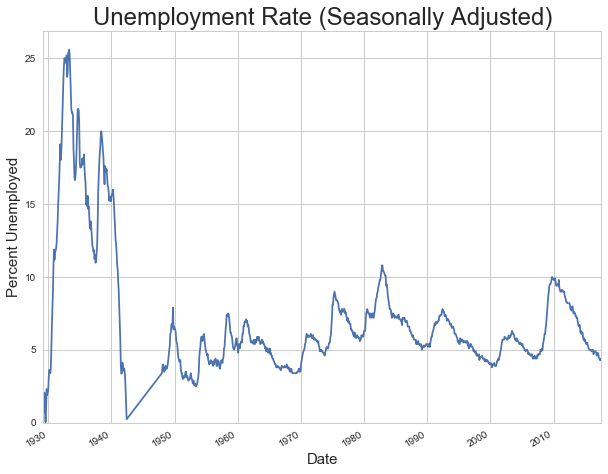

In [22]:
unemp_df.plot(legend = False)

plt.xlabel("Date", size = 15)
plt.ylim(0, )
plt.ylabel("Percent Unemployed", size = 15)
plt.title("Unemployment Rate (Seasonally Adjusted)", size = 24)

----

#### 1.2.2.3 The inflation rate and the price level

<img style="float:right;" src="http://delong.typepad.com/.a/6a00e551f08003883401b7c923e7ce970b-pi" alt="U.S. Inflation" title="U.S. Inflation" border="0" width="400" height="400" />

The third of the sets of key economic indicators are those of the overall price level. 

**Definition: Indexes and index numbers: a number used to indicate change in magnitude, usually of some sort of constructed average of a number of different components, as compared with the magnitude at some specified _base year_ time, usually taken as 100.**

**Definition: The price level: How much it costs, usually relative to some _base year_ set equal to an index value of 100, to buy a representative market basket of commodities.** 

In any well-functioning market economy prices will be rising and falling, signalling that some commodities are badly-wanted (at least, badly-wanted by those with money to spend) while other commodities are in relative surplus (or, rather, that those who badly want them have little money). These fluctuations in prices and the signals they end to workers, establishments, and firms about what would be profitable to do are the Hayekian magic of the market system, and a major reason why our civilization is more prosperous than any past civilization.

But on top of the fluctuations in the prices of individual commodities are the fluctuations in the overall price level: how much it costs to buy things in general — a typical "market basket" of commodities.

The major indicator we use to keep track of the overall price level is a measure of how fast it is changing: the inflation (or, rarely these days, the deflation rate). If the inflation rate this year is 5 percent, that means that in general things cost 5% more this year than they cost last year in terms of the symbols printed on dollar bills: it takes 5% more pieces of the right paper with George Washington's picture on them to purchase the market basket of commodities this year than it took last year.

A very high inflation rate — more than 20 percent a month, say — can cause massive economic destruction, as the price system breaks down and the possibility of using profit-and-loss calculations to make rational business decisions vanishes. Such episodes of hyperinflation are among the worst economic disasters that can befall an economy. But not since the Revolutionary War has the United States experienced hyperinflation.

Lower, moderate inflation rates — less than 10 percent a year, say — should not do much to derange economic decision making. Strangely, however, even moderate inflation turns out to be highly unsettling to consumers, business managers, and investors. Moderate inflation should not seriously compromise their ability to determine the best use of their financial resources or to calculate profitability: if what you buy costs 5% more than it cost last year, what you sell brings you 5% more than last year. Yet all these groups are strongly averse to it. Politicians in the industrialized economies have discovered that if they fail to preside over low and stable inflation rates then they are likely to lose the next election.

Since World War II there has been only one single year — in the late 1940s — during which the price level declined. Otherwise, there has been inflation. Post-World War II inflation has come in two varieties: the “creeping” inflation of the 1950s, early and mid-1960s, and 1990s, too small and slow for anyone to pay much attention to it; and the “trotting” inflation of the late 1960s, 1970s, and 1980s — too high to ignore and too tempting a political football for politicians to resist blaming the current government.

The steep decline in inflation that occurred in the early 1980s is called the “Volcker disinflation,” after then-Federal Reserve Chair Paul Volcker. Alarmed by the accelerating inflation of the late 1970s and early 1980s, Volcker decided to raise interest rates in order to decrease aggregate demand. In doing so, he risked a deep recession, which came in 1982-1983. But his action did push the rise in inflation back below the "moderate" and into the “creeping” range.

In the United States in the twentieth century significant peaks of inflation occurred during World Wars I and II, when overall rates of price increase peaked at more than 20 percent per year (see Figure 1.6). Before World War II, deep recessions like the Great Depression of the 1930s were accompanied by deflation: a decline in the level of overall prices that bankrupted businesses and banks, exacerbating the fall in output and employment. Since World War II, deflation has been absent.

In [23]:
# reading in the previously-downloaded consumer price index series 
# from FRED: Federal Reserve Economic Data at the St. Louis Fed
# http://fred.stlouisfed.org series CPIAUCSL
#
# constructing a dataframe to hold the data, and then wrapping
# that dataframe inside a dict object to append source notes and
# links

SourceURL = "http://delong.typepad.com/cpiaucsl.csv"

cpiinfl_df = pd.read_csv(
    SourceURL, 
    parse_dates = True,
    index_col = 0)

cpiinfl_dict = {}
cpiinfl_dict["df"] = cpiinfl_df
cpiinfl_dict["SourceURL"] = SourceURL
cpiinfl_dict["Source"] = "Federal Reserve Economic Data: Series CPIAUCSL"

SourceNotes1 = "Consumer price index; "
SourceNotes2 = "see https://fred.stlouisfed.org/graph/?id=CPIAUCSL,"
cpiinfl_dict["SourceNotes"] = SourceNotes1 + SourceNotes2
cpiinfl_dict["SourceDescription"] = "CPI for all urban consumers and trailing 12-mo inflation rate"

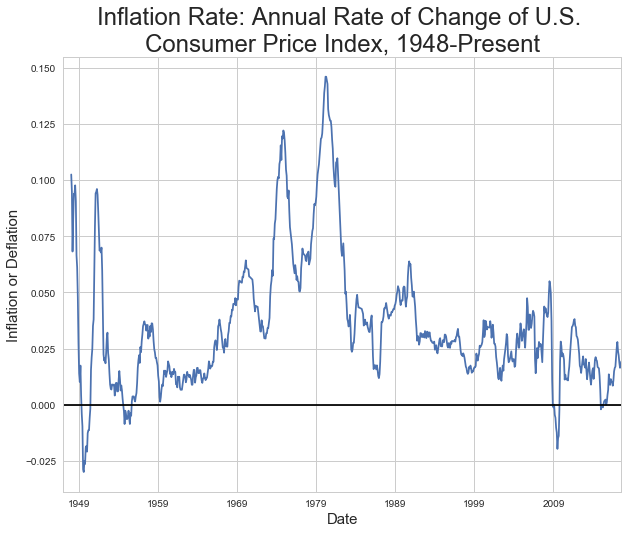

In [24]:
cpiinfl_df.Inflation_Rate_CPI.plot()

plt.xlabel("Date", size = 15)
plt.ylabel("Inflation or Deflation", size = 15)
plt.title("Inflation Rate: Annual Rate of Change of U.S. \nConsumer Price Index, 1948-Present", 
    size = 24)

plt.plot((-300, 600), (0, 0), 'k')

#### 1.2.2.4 Financial markets

<img style="float:right;" src="http://delong.typepad.com/.a/6a00e551f08003883401b7c923eafa970b-pi" alt="Interest Rates" title="Interest Rates" border="0" width="400" height="400" />

The fourth set of key economic indicators are the prices of financial assets traded on the financial markets. There are the prices of and interest rates or yields on bonds — commitments by companies, governments, or individuals to pay interest and repay principal in return for loans. There are the prices of and the dividend and earnings yields on stocks — claims to shares of the ownership of for-profit companies. 

**Definition: Interest rate: The cost, measured in percent per year, paid for borrowing money; alternatively, the financial return from saving.**

Though economists speak of “the” interest rate, there are actually many different interest rates applying to loans of different durations and different degrees of risk. (After all, the person or business entity to whom you lend your money may be unable to pay it back; that is a risk you accept when you make a loan.) The different interest rates often move up or down together, so economists speak of “the” interest rate, referring to the entire complex of different rates. But interest rates do not move in concert all the time. The causes of variations in the yield curve, which describes the pattern of interest rates, are an important part of macroeconomics.

The pattern of interest rates is important because it governs the redistribution of purchas  ing power across time. Those people or business enterprises who think they can make good use of additional financial resources borrow, promising to return the purchasing power they use today with interest in the future. Those business enter  prises or people who have no immediate use for their financial resources lend, hop  ing to profit when the borrower returns the borrowed sum — what financiers call the principal — with interest.

When economists think about interest rates, however, they almost always prefer to focus on the real interest rate rather than the nominal interest rate. The nominal interest rate is the interest rate in terms of money — for example, how many dollars’ worth of interest a borrower must pay to borrow a given sum of money for one year. The real interest rate is the interest rate in terms of goods and services — for example, how much purchasing power over goods and services a borrower must pay in order to borrow a given amount of purchasing power for one year. The difference between the two is that nominal interest rates do not take proper account of the effect of inflation; real interest rates do.

Whenever interest rates are low — that is, when money is “cheap” — investment tends to be high, because businesses find that a wide range of possible investment projects will generate enough cash to pay the interest on borrowed money, repay the principal of the loan, and still produce a profit. Whenever interest rates are high — that is, when money is “dear” — investment tends to be low, because busi  nesses find that most possible investment projects will not generate enough cash flow to repay the principal and the high interest. Box 1.6 shows changes in real interest rates in the United States since 1960.

<img src="http://delong.typepad.com/.a/6a00e551f08003883401b8d2ae8d54970c-pi" alt="U S Stock Market Real i e Inflation Adjusted Prices and Dividends" title="U_S__Stock_Market__Real__i_e___Inflation-Adjusted__Prices_and_Dividends.png" border="0" width="400" height="400" style="float:right;" />

**Definition: Stock market: the notional market on which stocks or equities, which are shares of the ownership of corporations and thus carry with them rights to receive a share of the profits of those corporations, are traded.**

**Definition: Stock market index: a measure of the overall value of the stock market in the form of an index number constructed out of the values of shares of stock in individual companies. The best well-known index is the S&P — Standard and Poor's — 500: a value-weighted index of 500 companies traded on the American stock market. An inferior index is the DJIA — the Dow-Jones Industrial Average.**

The level of the stock market is the key economic indicator you hear about most often — you do hear about it every single day, unless you make an active effort to avoid the news on the TV or the raido. 

The level of the stock market is an index of expectations for the future. When the stock market is high, investors expect economic growth to be rapid, profits to be high, and unemployment to be relatively low. (Note, however, that there is an ele  ment of tail chasing in the stock market. Perhaps it would be more accurate to say that the stock market is high when average opinion expects that average opinion will expect that future economic growth will be rapid.) Conversely, when the stock market is low, investors expect the economic future to be relatively gloomy.

At times, such as the end of the 1960s or the end of the 1990s, the stock mar  ket appears significantly overvalued compared to its standard historical patterns. During such episodes investors are implicitly forecasting a major boom and con  tinued rapid productivity growth. When their forecasts turn out to be wrong, these investors are severely disappointed with their stock market investments. Box 1.7 shows the course of the U.S. stock market over the past century.

----

In [25]:
# reading in the previously-downloaded interest rate series 
# from FRED: Federal Reserve Economic Data at the St. Louis Fed
# http://fred.stlouisfed.org series DTB3, DGS10, BAMLC0A4CBBBEY
#
# constructing a dataframe to hold the data, and then wrapping
# that dataframe inside a dict object to append source notes and
# links

SourceURL = "http://delong.typepad.com/interest_rates-1.csv"

intr_df = pd.read_csv(
    SourceURL, 
    parse_dates = True,
    index_col = 0)

intr_df = intr_df.convert_objects(convert_numeric=True)

intr_dict = {}
intr_dict["df"] = intr_df
intr_dict["SourceURL"] = SourceURL
intr_dict["Source"] = "Federal Reserve Economic Data: Series DTB3, DGS10, BAMLC0A4CBBBEY"

SourceNotes1 = "Interest rates: http://fred.stlouisfed.org/graph/?id=DTB3, "
SourceNotes2 = "http://fred.stlouisfed.org/graph/?id=DGS10, "
SourceNotes3 = "http://fred.stlouisfed.org/graph/?id=BAMLC0A4CBBBEY,"
intr_dict["SourceNotes"] = SourceNotes1 + SourceNotes2 + SourceNotes3

SourceDescription1 = "Three month nominal Treasury bill rate, "
SourceDescription2 = "ten-year nominal Treasury bond rate, "
SourceDescription3 = "and BAML corporate BBB rate"

intr_dict["SourceDescription"] = SourceDescription1 + SourceDescription2 + SourceDescription3

# NOW COMMENTED OUT
# intr_dict

/Users/delong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning:

convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



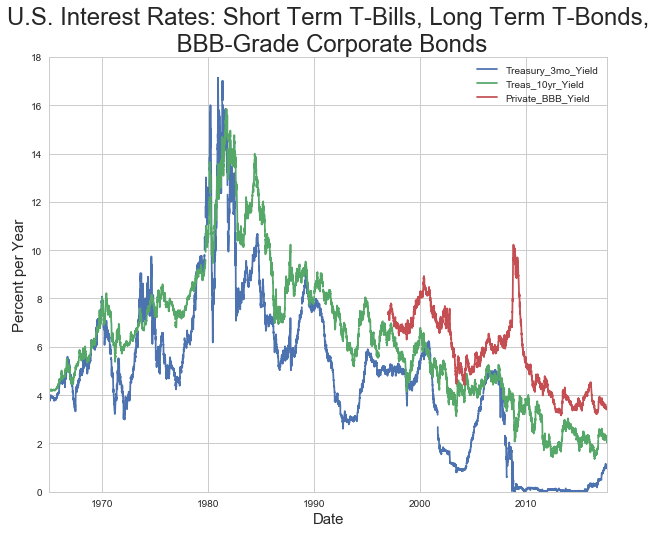

In [26]:
intr_df.plot()

plt.xlabel("Date", size = 15)
plt.ylim(0, )
plt.ylabel("Percent per Year", size = 15)
plt.title("U.S. Interest Rates: Short Term T-Bills, Long Term T-Bonds,\n BBB-Grade Corporate Bonds", 
    size = 24)

In [27]:
# reading in the previously-downloaded stock market S&P-Cowles related series 
# from Robert Shiller's website: http://www.econ.yale.edu/~shiller/data.htm
#
# constructing a dataframe to hold the data, and then wrapping
# that dataframe inside a dict object to append source notes and
# links

SourceURL = "http://delong.typepad.com/2017-09-25_shiller_stock.csv"

stock_df = pd.read_csv(
    SourceURL, 
    parse_dates = True,
    index_col = 0)

stock_df = stock_df.convert_objects(convert_numeric=True)


stock_df["Perm_Earn_Real_10"] = (stock_df.Price_Real / stock_df.CAPE * 20) 

stock_dict = {}
stock_dict["df"] = stock_df
stock_dict["SourceURL"] = SourceURL

Source1 = "Robert Shiller's 'Irrational Exuberance' Dataset: "
Source2 = "http://www.econ.yale.edu/~shiller/data.htm"
stock_dict["Source"] = Source1 + Source2

stock_dict["SourceNotes"] = "S&P 500 index extended back using Cowles Commission index"

SourceDescription1 = "Stock index prices, earnings, and dividends; "
SourceDescription2 = "with CPI and nominal bond rate, plus CAPE"
stock_dict["SourceDescription"] = SourceDescription1 + SourceDescription2

# CHECK; COMMENTED OUT
# stock_df.dtypes

/Users/delong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning:

convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



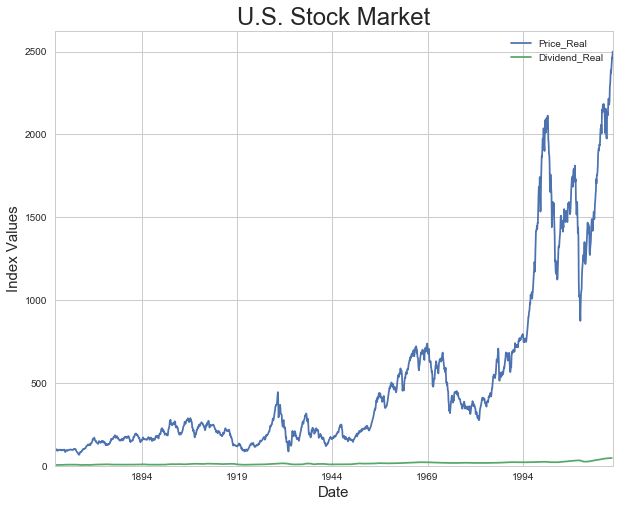

In [28]:
real_stock_price_fundamental_df = stock_df.loc[:, ["Price_Real", "Dividend_Real"]].plot()

plt.xlabel("Date", size = 15)
plt.ylim(0, )
plt.ylabel("Index Values", size = 15)
plt.title("U.S. Stock Market", size = 24)

##### BOX: 1.2.2.4(a) Real interest rates: data

<img src="http://delong.typepad.com/.a/6a00e551f08003883401b7c9243450970b-pi" alt="Real Interest Rates" title="Real_Interest_Rates.png" border="0" width="400" height="400" style="float:right;" />

Interest rates on long-term debt, like the 10-year notes issued by the U.S. Treasury, are usually higher than interest rates on short-term debt, like the 3-month Trea  sury bills. Whenever long-term interest rates are lower than short-term interest rates, the yield curve is said to be “inverted.” An inverted yield curve is one of the signals of a possible coming recession.

Interest rates have fluctuated widely in the United States since 1960 (see Fig  ure 1.7). Real interest rates — that is, interest rates adjusted for inflation — have even been negative at times. During the 1970s nominal — money — interest rates were so low and inflation was so high that the interest and principal on a short  term loan bought fewer commodities when the loan was repaid than the origi  nal principal could have purchased when the loan was made. In the early 1980s — the Volcker years — interest rates increased radically. They remained higher than their levels in the 1950s and 1960s until 2001 when the Federal Reserve, led by Alan Greenspan, lowered nominal rates eleven times to stimulate the macroeconomy.

For more than a century and a quarter, the United States has had a thick market in equities — the “stocks” of a corporation, pieces of paper that indicate ownership of its shares. One of the major indexes that track the performance of the stock mar  ket as a whole is Standard and Poor’s composite index, the S&P 500. Figure 1.8  plots the real value — that is, the value adjusted for inflation — of this stock mar  ket index over time.
Over the past century, on average, a share of stock has traded for about 15 times its past year’s, or “trailing,” earnings per share. Earnings per share are calculated by dividing a corporation’s annual profits by the number of shares of stock the cor  poration has outstanding. The 15-times-earnings figure is only an average: Com  panies with good prospects for growth sell for more than 15 times their earnings, and corporations seen as being in decline sell for less.
In some years expectations of the future of the economy are relatively depressed, and stock indexes like the S&P 500 sell for much less than the 15 times earnings rule of thumb. Consider 1982, when the stock market as a whole was worth 40 per  cent less than 15 times earnings.
Since 1997 real stock index prices have far exceeded their standard, conven  tional valuation of 15 times earnings. A large part of this was the result of the spec  ulative mania — the “irrational exuberance” — of the dot-com bubble of the late 1990s. But a large gap between the stock market and conventional valuations remains even after the collapse of the dot-com bubble. Economists differ over how much of this phenomenon is due to (1) a continued irrational speculative mania that has outlasted even the stock market crash of 2000-2001, (2) an increased tol  erance for risk, (3) a reflection of low interest rates, or (4) expectations of more rapid future economic growth.

In [29]:
# reading in the previously-downloaded interest rate series plus CPI 
# from FRED: Federal Reserve Economic Data at the St. Louis Fed
# http://fred.stlouisfed.org series DTB3, DGS10, BAMLC0A4CBBBEY, 
# CPIAUCSL
#
# constructing a dataframe to hold the data, and then wrapping that
# dataframe inside a dict object to append source notes and links

SourceURL = "http://delong.typepad.com/2017-09-26_real_interest.csv"

intr_real_df = pd.read_csv(
    SourceURL, 
    parse_dates = True,
    index_col = 0)

intr_real_df = intr_real_df.convert_objects(convert_numeric=True)



intr_real_df["Real_TBill_Yield"] = (0
    + intr_real_df.Treasury_3mo_Yield/100 
    - intr_real_df.Inflation_CPI)

intr_real_df["Real_TBond_Yield"] = (0
    + intr_real_df.Treas_10yr_Yield/100 
    - intr_real_df.Inflation_CPI)

intr_real_df["Real_Private_BBB_Yield"] = (0
    + intr_real_df.Private_BBB_Yield/100 
    - intr_real_df.Inflation_CPI)

intr_real_dict = {}
intr_real_dict["df"] = intr_real_df
intr_real_dict["SourceURL"] = SourceURL
intr_real_dict["Source"] = "Federal Reserve Economic Data: Series TB3, GS10, BAMLC0A4CBBBEY, CPIAUCSL"

source_R1 = "Real interest rates: http://fred.stlouisfed.org/graph/?id=TB3, "
source_R2 = "http://fred.stlouisfed.org/graph/?id=GS10, "
source_R3 = "http://fred.stlouisfed.org/graph/?id=BAMLC0A4CBBBEY, "
source_R4 = "https://fred.stlouisfed.org/graph/?id=CPIAUCSL,"
intr_real_dict["SourceNotes"] = source_R1 + source_R2 + source_R3 + source_R4

source_R5 = "Real interest rates: trailing 12-month change in monthly CPI calculated "
source_R6 = "and then subtracted from Three month nominal Treasury bill rate, ten-year nominal Treasury bond rate, "
source_R7 = "and BAML corporate BBB rate"
intr_real_dict["SourceDescription"] = source_R5 + source_R6 + source_R7

# check; commented out
# intr_real_df.dtypes

/Users/delong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning:

convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



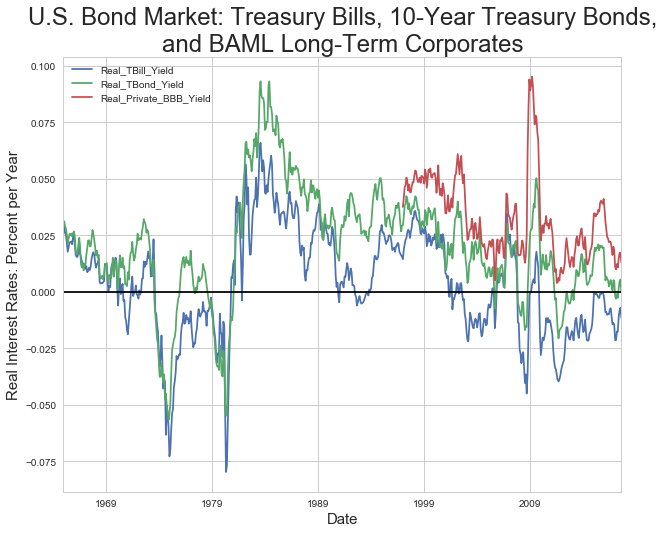

In [30]:
intr_real_df.loc[:, ["Real_TBill_Yield", "Real_TBond_Yield", "Real_Private_BBB_Yield"]].plot()

plt.xlabel("Date", size = 15)
plt.ylabel("Real Interest Rates: Percent per Year", size = 15)
plt.title("U.S. Bond Market: Treasury Bills, 10-Year Treasury Bonds,\nand BAML Long-Term Corporates", 
    size = 24)
plt.plot((-150, 600), (0, 0), 'k')

##### Box: 1.2.2.4(b) The stock market: data 

<img src="https://www.evernote.com/l/AAG-zX_71ZpB66QEEBbisYCikZdg1L5OTvAB/image.png" style="float:right;" height="400" width="400" />

FIGURE 1.8
Real Stock Index Prices Since 1997 real stock index prices have far exceeded their standard, conventional valuation of 15 times earnings.

----

#### 1.2.2.5 The exchange rate

The fifth and last key economic quantity is the exchange rate. The nominal exchange rate is the rate at which the moneys of different countries can be exchanged for one another. The real exchange rate is the rate at which the goods and services produced in different countries can be exchanged for one another. The exchange rate governs the terms on which international trade and investment take place. When the domes  tic currency is appreciated, its value in terms of other currencies is high. Foreign- produced goods are relatively cheap for domestic buyers, but domestic-made goods are relatively expensive for foreigners. In these circumstances imports are likely to be high; exports are likely to be low. When the domestic currency is depreciated, the opposite is the case. Domestically made goods are cheap for foreign buyers. Thus exports are likely to be high. But domestic consumers’ and investors’ power to pur  chase foreign-made goods is limited. Thus imports are likely to be low. Box 1.8 details the effects of changes in the U.S. exchange rate since 1977.

**Definition: Nominal exchange rate: The rate at which one country's money can be turned into another's; the price of one unit of foreign currency in terms of the home currency.**

**Definition: Real exchange rate: The rate at which goods produced in a foreign country can be bought or sold for goods produced in the home country; the price of foreign- produced goods relative to domestic-produced goods.**

----

##### BOX: Details: The exchange rate

The terms on which people in one country can buy goods and services made in other countries and sell the goods and services they make themselves are summa  rized in the exchange rate. The nominal exchange rate tells how many units of domestic currency it takes to buy 1 unit of foreign currency; it is the value of a foreign currency. The real exchange rate adjusts for differences in the rate of infla  tion between countries. Thus it measures the relative price of tradeable goods: how much in the way of foreign-produced goods can be bought with 1 unit of domestically produced goods.

Before the early 1970s, the U.S. exchange rate was fixed vis-a-vis other major currencies in the Bretton Woods system. The U.S. Treasury stood ready to buy or sell dollars in exchange for other currencies at fixed parities determined by each country’s posted valuation of its currency in terms of gold.
Since the early 1970s the U.S. exchange rate has been floating — free to move up or down in response to the market forces of supply and demand (see Figure 1.9). When U.S. interest rates are relatively high compared to those of other countries — as in the early 1980s — the dollar appreciates. In such a case the dollar becomes much more valuable, as many people try to invest in America to capture the high interest rates. We then say that the value of the exchange rate is relatively low. The exchange rate is defined as the value (in terms of dollars) of foreign cur  rency: When the relative value of the dollar rises, the value in dollars of foreign currency falls.
When U.S. interest rates fall relative to those in other countries, the dollar tends to depreciate, to fall in value, so U.S. goods are cheap to buy and easy to sell. When the dollar’s value is low and the dollar has depreciated, the exchange rate — the value in dollars of foreign currency — is relatively high.

----

The indicators of national income and product, the employment and unemployment rates, the inflation rate and the price level, the interest rate and the stock market, and the exchange rate—these are the five key sets of measures of the macroeconomy. Know the values of these key variables in context — both their relative levels today and their recent trends — and you have a remarkably complete picture of the current state of the macroeconomy.

### 1.2.3 Tracking the Macroeconomy: Recap

Know and understand five key sets of macroeconomic measures and indicators, and you understand most of what there is to know about the state of the macroeconomy. The first key variable is the level of real GDP — the real inflation-adjusted value of goods and services. The second key variable is the unemployment rate — the fraction of the labor force that is out of work. The third key variable is the inflation rate — a measure of how rap  idly the overall price level is changing. The fourth key set of indicators are the financial market prices—interest rates and the level of the stock market. is the interest rate. When economists think about interest rates, they almost always prefer to focus on the real interest rate rather than the nominal interest rate. The level of the stock market is a good indicator of investor confidence and of the likely future pace of investment spending. The fifth and last key variable is the exchange rate — the price at which goods made here at home are exchanged for goods made abroad.

----

**Glossary Entries**:

_Real GDP_: Inflation-adjusted gross domestic product; the most commonly used measure
of national product, output, and income earned through domestically produced goods and services.

_Real GDP per Worker_: One of the best available measures of long-term economic growth: real GDP divided by the number of workers (or, alternatively, by the total number of hours worked).

_Unemployment Rate_: The share of the labor force who are looking for but have not found an acceptable job.

inflation rate
The annual rate of change of the overall level of prices in the economy.

interest rate
The price, measured in percent per year, paid for borrowing money. Conversely, the return earned by saving.

stock market
The market in which the shares of common stock that carry ownership of companies are bought and sold.

nominal exchange rate
The rate at which one country's money can be turned into another's; the price of one unit of foreign currency in terms of the home currency.

real exchange rate
The rate at which goods produced in a foreign country can be bought or sold for goods produced in the home country; the price of foreign- produced goods relative to domestic-produced goods.

----

**Key Points**:

1. The five key sets of measures in macroeconomics are:
    1. real natioanal income and product
    2. the employment and unemployment rates
    3. the inflation rate and the price level
    4. The configuration of interest rates and the level of the stock market
    5. The exchange rate.

### 1.2.3 Tracking the Macroeconomy: Exercises

**Analytical Exercises**:

1. Why are real GDP and the unemployment rate important macroeconomic variables?
2. Why are the interest rate and the level of the stock market important economic variables?

----

**Policy Exercises**:

1. What is the current inflation rate? If you find more than one inflation rate listed, are the rates consistent with each other?
2. What is the current level of the stock market? How does it compare to the level of the stock market at the begin  ning of 2000?
3. How does the current level of the stock market compare with the historical average, roughly 15 times a stock market index’s trailing earnings?